In [4]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [5]:
# Create a synthetic dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relation with some noise

In [6]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Train a simple Linear Regression model (without regularization)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [9]:
# Predict and evaluate
y_pred = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred)
mse_lin

0.6536995137170021

- Ridge Regression: This model penalizes large coefficients, reducing the chance of overfitting by encouraging smaller coefficients.
- Lasso Regression: This model encourages sparse coefficients, which can lead to feature selection by making some coefficients exactly zero.

- Ridge Regression (L2 Regularization):
    - Alpha Value (e.g., 1): In Ridge Regression, alpha determines how strongly the penalty on the coefficients is applied. A higher alpha value increases the penalty, making the coefficients smaller and potentially improving the model's ability to generalize. An alpha value of 1 is a common starting point but can be adjusted based on cross-validation performance.
- Lasso Regression (L1 Regularization):
    - Alpha Value (e.g., 0.1): In Lasso Regression, alpha also controls the penalty strength, but since Lasso can shrink some coefficients exactly to zero, a smaller alpha (like 0.1) is often used to ensure that the model remains sufficiently flexible while still benefiting from feature selection. A smaller value of alpha might be chosen to avoid overly aggressive shrinking, which could otherwise lead to underfitting.

In [11]:
# Ridge Regression (L2 Regularization)
ridge_reg = Ridge(alpha=1)  # alpha is the regularization strength
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_ridge

0.647613237305426

In [12]:
# Lasso Regression (L1 Regularization)
lasso_reg = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_lasso

0.6584189249611411

In [13]:
# Display the results
print(f"Linear Regression MSE: {mse_lin:.4f}")
print(f"Ridge Regression MSE: {mse_ridge:.4f}")
print(f"Lasso Regression MSE: {mse_lasso:.4f}")

Linear Regression MSE: 0.6537
Ridge Regression MSE: 0.6476
Lasso Regression MSE: 0.6584


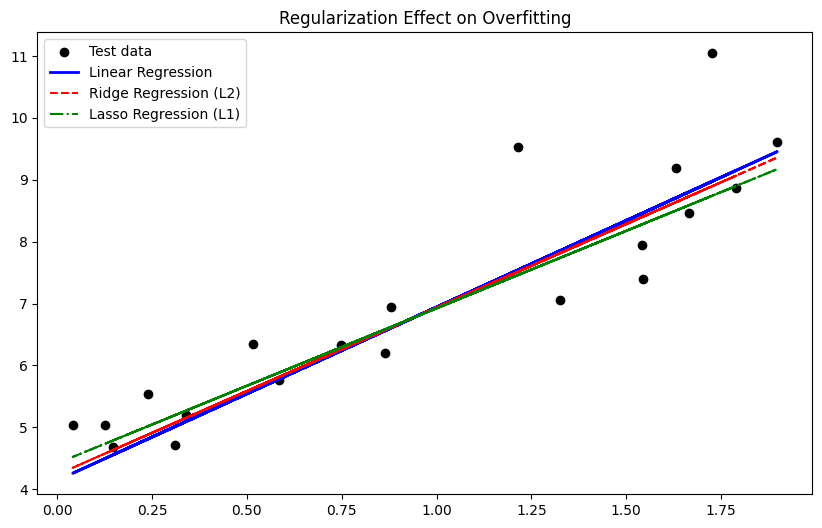

In [14]:
# Plot the models' predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Test data')
plt.plot(X_test, y_pred, label='Linear Regression', color='blue', linewidth=2)
plt.plot(X_test, y_pred_ridge, label='Ridge Regression (L2)', color='red', linestyle='--')
plt.plot(X_test, y_pred_lasso, label='Lasso Regression (L1)', color='green', linestyle='-.')
plt.title('Regularization Effect on Overfitting')
plt.legend()
plt.show()
